##Diabetic_Dataset_in_LogisticRegression


Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old.

1. Pregnancies  : Number of times pregnant
2. Glucose      : Plasma glucose concentration a 2 hours in an oral glucose        tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin      : 2-Hour serum insulin (mu U/ml)
6. BMI          : Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age          : Age (years)
9. Outcome      : Class variable (0 or 1)

In [ ]:
#importing the common and required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [ ]:
#importing the diabetic dataset into colab notebook.
from google.colab import files
data_to_load = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
#creating a dataframe as diab_data.
import io
diab_data = pd.read_csv(io.BytesIO(data_to_load['diabetes.csv']))


In [ ]:
#to check the first five rows of data.
diab_data.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,89,66,23,94,28.1,0.167,21,neg
1,0,137,40,35,168,43.1,2.288,33,pos
2,3,78,50,32,88,31.0,0.248,26,pos
3,2,197,70,45,543,30.5,0.158,53,pos
4,1,189,60,23,846,30.1,0.398,59,pos


In [ ]:
#to check the datatype of the features.
diab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  392 non-null    int64  
 1   glucose   392 non-null    int64  
 2   pressure  392 non-null    int64  
 3   triceps   392 non-null    int64  
 4   insulin   392 non-null    int64  
 5   mass      392 non-null    float64
 6   pedigree  392 non-null    float64
 7   age       392 non-null    int64  
 8   diabetes  392 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 27.7+ KB


In [ ]:
#so,here converting the diabetes features object into numeric by using mapping function.
#negative as '0' and positive as'1'.
diab_data["diabetes"] = diab_data["diabetes"].map({"neg":0, "pos":1})

In [ ]:
#to check after converted feature of the dataset.
diab_data.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1


Let us visualize how the "Probability of having diabetes" changes when there is a change in another variable.

Let us consider the variable "pedigree" for this purpose.

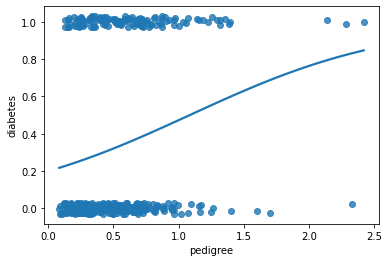

In [ ]:
sns.regplot(x = "pedigree", y = "diabetes", y_jitter=0.03, data = diab_data, logistic = True, ci = None)
plt.show()

In [ ]:
#to check the discribtive statstical version of the data
diab_data.describe()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Fitting a Binary Logistics Regression model.



*Let us first split the data into "training data set" and "test data set".

*We use 80% of the data for training set and 20% for test set. However,we can change this proportion to 70 - 30 or 75 - 25 also.

For splitting the data we ise a function "train_test_split" from Scikit learn liibrary.


In [ ]:
#spliting the data into test and train set
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(diab_data, test_size = 0.20, random_state = 42)

We will now fit a Binary Logistic Regression Model.

In [ ]:
import statsmodels.api as smf   #importing the libraries
from statsmodels.formula.api import logit 

formula = ('diabetes ~ pregnant + glucose + pressure + triceps + insulin + mass + pedigree + age')

diab_model = logit(formula = formula, data = train_data).fit()

Optimization terminated successfully.
         Current function value: 0.426450
         Iterations 7


Getting the summary of the model.

In [ ]:
diab_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               diabetes   No. Observations:                  313
Model:                          Logit   Df Residuals:                      304
Method:                           MLE   Df Model:                            8
Date:                Tue, 23 Aug 2022   Pseudo R-squ.:                  0.3269
Time:                        18:43:47   Log-Likelihood:                -133.48
converged:                       True   LL-Null:                       -198.29
Covariance Type:            nonrobust   LLR p-value:                 3.382e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.3495      1.390     -7.444      0.000     -13.075      -7.624
pregnant       0.1181      0.063      1.888      0.059      -0.005       0.241
glucose        0.0380      0.006      5.937      0.000       0.025       0.051
pressure       0.0099      0.014      0.701      0.483      -0.018       0.037
triceps        0.0211      0.019      1.100      0.271      -0.017       0.059
insulin        0.0010      0.001      0.666      0.505      -0.002       0.004
mass           0.0472      0.032      1.476      0.140      -0.015       0.110
pedigree       1.2316      0.484      2.543      0.011       0.282       2.181
age            0.0188      0.020      0.950      0.342      -0.020       0.058
==============================================================================
"""

In [ ]:
#Getting the Odds Ratio(OR)

In [ ]:
print(np.exp(diab_model.params))

Intercept    0.000032
pregnant     1.125365
glucose      1.038708
pressure     1.009922
triceps      1.021353
insulin      1.000981
mass         1.048328
pedigree     3.426683
age          1.019004
dtype: float64


Evaluating the Model.
1. We evaulate the model by applying it on test data.

2. For this purpose we use some packages from SCIKIT learn.

In [ ]:
#importing the accuracy and roc(receiver operating characteristic curve) libraries
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [ ]:
#Applying the model on test data, getting the predictions and storing it in a variable called "predicted_prob"
predicted_prob = diab_model.predict(exog = test_data)

In [ ]:
#Let us define the cut-off for the predicted probabilities - Let us start with 0.5 (and then change it as required)
cutoff = 0.5

In [ ]:
# Compute predicted class/group based on cut-off and store it in a variable called "diab_predicted"
diab_predicted = np.where(predicted_prob > cutoff, 1, 0)

In [ ]:
# Assign the original/actual values from the test sample to diab_actual
diab_actual = test_data["diabetes"]

In [ ]:
# Compute and print confusion matrix using crosstab function
conf_matrix = pd.crosstab(diab_actual, diab_predicted,
                       rownames = ["Actual"], 
                       colnames = ["Predicted"], 
                       margins = True)

In [ ]:
# Print the confusion matrix
print(conf_matrix)

Predicted   0   1  All
Actual                
0          44   8   52
1          11  16   27
All        55  24   79


Classification Accuracy

In [ ]:
accuracy = accuracy_score(diab_actual, diab_predicted)

print('Accuracy: %.2f' % accuracy + "%")

Accuracy: 0.76%


Classification report.

In [ ]:
print(classification_report(diab_actual, diab_predicted))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        52
           1       0.67      0.59      0.63        27

    accuracy                           0.76        79
   macro avg       0.73      0.72      0.72        79
weighted avg       0.75      0.76      0.76        79



f1 - Score
F_1 ={precision * recall / precision + recall }
f1=TP/{TP + {1/2(FP) + (FN)}}

As a short reminder, the harmonic mean is an alternative metric for the more common arithmetic mean. It is often useful when computing an average rate.

In [ ]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(diab_actual, diab_predicted)))

F1 Score: 0.627450980392157


ROC_AUC estimation
roc_auc_score is defined as the area under the ROC curve, which is the curve having False Positive Rate on the x-axis and True Positive Rate on the y-axis at all classification thresholds.

In [ ]:
roc_auc = roc_auc_score(diab_actual, diab_predicted)
print('AUC: %.2f' % roc_auc + "%")

AUC: 0.72%


In [ ]:
#First we need to install plot-metrices
!pip install plot-metric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


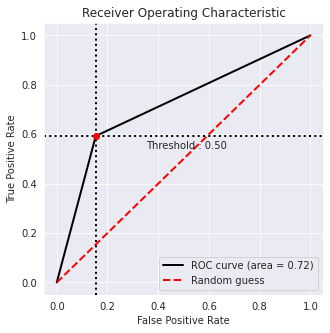

In [ ]:
from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(diab_actual,
                          diab_predicted,
                          labels = ["Class 1", "Class 2"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()